<a href="https://colab.research.google.com/github/parkminhyung/R-code-for-finance/blob/master/k-mean%20clustering%20portfolio.R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install required packages

In [1]:
install.packages("pacman")
pacman::p_load("rvest","quantmod","cluster","NbClust","plotly","dplyr","tibble","factoextra","gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’



quantmod installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


NbClust installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘Rcpp’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’



plotly installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘httpuv’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘p

### Extract tickers of S&P500 from wikipedia

In [2]:
snp500url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies" %>%
  read_html() %>%
  html_table() %>% .[[1]] %>%
  select(Symbol) %>% .$Symbol %>%
  c()


### Download close price data and bind each price data

In [13]:
start_date = "2019-01-01" ; end_date = '2023-01-01'

df = data.frame()
for (ticker in snp500url) {
  try({
    df = getSymbols(
      ticker,
      from = start_date,
      to = end_date,
      auto.assign = FALSE
    ) %>% Cl() %>%
      cbind(.,df)
  })
}

Error in getSymbols.yahoo(Symbols = "BRK.B", env = <environment>, verbose = FALSE,  : 
  Unable to import “BRK.B”.
HTTP error 404.
Error in getSymbols.yahoo(Symbols = "BF.B", env = <environment>, verbose = FALSE,  : 
  Unable to import “BF.B”.
attempt to set an attribute on NULL
Error in getSymbols.yahoo(Symbols = "KVUE", env = <environment>, verbose = FALSE,  : 
  Unable to import “KVUE”.
HTTP error 400.


### calculate return of each stocks

In [14]:
df = df %>%
  setNames(
    gsub(x=colnames(.),pattern = ".Close",replacement = "")
  ) %>%
  ROC() %>% na.fill(0) %>%
  as.data.frame()
df

,ZTS,ZION,ZBH,ZBRA,YUM,XYL,XEL,WYNN,GWW,WTW,⋯,AES,ADP,ADBE,ADM,ATVI,ACN,ABBV,ABT,AOS,MMM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-01-02,0.0000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000e+00,0.0000000000,⋯,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000000,0.0000000000
2019-01-03,-0.0351759439,-0.005546942,-0.0182532155,-0.0617773616,-0.0254748855,-0.034881901,-0.0039481078,-0.009721450,-3.136381e-02,-0.0212012501,⋯,-0.0007054835,-0.0306636104,-0.0402989560,-0.0044053009,-0.036154997,-0.034738302,-0.0335036164,-0.0483442020,-0.024451167,-0.0383810692
2019-01-04,0.0384848428,0.030251217,0.0335829106,0.0406258716,0.0256935475,0.041326289,0.0097380077,0.039540569,4.054139e-02,0.0266647013,⋯,0.0326304729,0.0390805709,0.0474868256,0.0227943582,0.039127386,0.038146748,0.0317088469,0.0281415037,0.039293264,0.0403169286
2019-01-07,0.0059988948,0.003980850,0.0003850465,0.0150524616,-0.0010939556,-0.014899899,-0.0043392791,0.017601742,-7.190913e-03,0.0073483539,⋯,0.0047700052,-0.0054246739,0.0134813419,0.0050221101,0.027805739,0.003467365,0.0144898103,0.0148646960,0.017747314,-0.0023024732
2019-01-08,0.0147840920,0.009072980,-0.0226807068,0.0066748760,-0.0019721745,0.009357188,0.0115298284,0.030851934,6.653406e-03,0.0063776225,⋯,0.0228504667,0.0058817285,0.0148073808,0.0184359418,0.029859052,0.024975151,0.0046367732,-0.0120789390,0.024198244,0.0041822928
2019-01-09,-0.0035885615,0.008532254,0.0081384871,0.0245163273,-0.0004387990,0.016093356,-0.0080156508,0.012936346,3.685218e-03,-0.0060478632,⋯,-0.0019953271,0.0009134830,0.0117495107,0.0086277539,0.017063918,0.005016991,-0.0333737959,0.0165532943,0.013814232,0.0032293917
2019-01-10,-0.0038343371,0.004810434,0.0128082661,0.0008734676,0.0071065901,0.018453981,0.0165766894,-0.026311490,1.587272e-02,0.0110817329,⋯,0.0210811291,0.0078824762,0.0098902396,0.0069412412,0.010178139,0.007852880,0.0044315668,-0.0051978257,-0.002145973,0.0067375379
2019-01-11,0.0018608523,0.005242254,0.0053846702,0.0176174596,-0.0093033940,0.005932102,0.0004058534,0.019115954,3.518433e-05,0.0041647706,⋯,0.0032541643,-0.0061339242,-0.0009256974,-0.0048537964,-0.098352729,-0.005387966,0.0012463954,0.0036124596,-0.004521465,-0.0072056471
2019-01-14,-0.0182931647,0.007473662,-0.0153648897,0.0025091269,-0.0103903049,-0.002310747,-0.0073305278,-0.049186585,-1.163156e-02,-0.0027311641,⋯,-0.0230046542,-0.0057132133,-0.0126667322,-0.0072085274,0.015986698,-0.008929879,-0.0410295652,-0.0154073571,0.001293970,-0.0002081718


### Normalize function

In [12]:
normalize <- function(x) {
  return((x-min(x))/(max(x)-min(x)))
}


### Create df_cleaned consisted of return and standard deviation

In [15]:
df_cleaned = data.frame(
  Return = df %>%
    summarise(across(everything(),mean)) %>%
    mutate_all(~.*252) %>% t(),
  STD = df %>%
    summarise(across(everything(),sd)) %>%
    mutate_all(~.*sqrt(252)) %>% t()
) %>% na.omit() %>% normalize()
df_cleaned

,Return,STD
,<dbl>,<dbl>
ZTS,0.4085405,0.5149996
ZION,0.3425340,0.5979391
ZBH,0.3567376,0.5439988
ZBRA,0.3989910,0.5999314
YUM,0.3717179,0.5028230
XYL,0.4012140,0.5409678
XEL,0.3781430,0.4911149
WYNN,0.2731073,0.7221579
GWW,0.4339979,0.5263649


### compute optimal number of clusters using elbow curve, shilhoutte ...

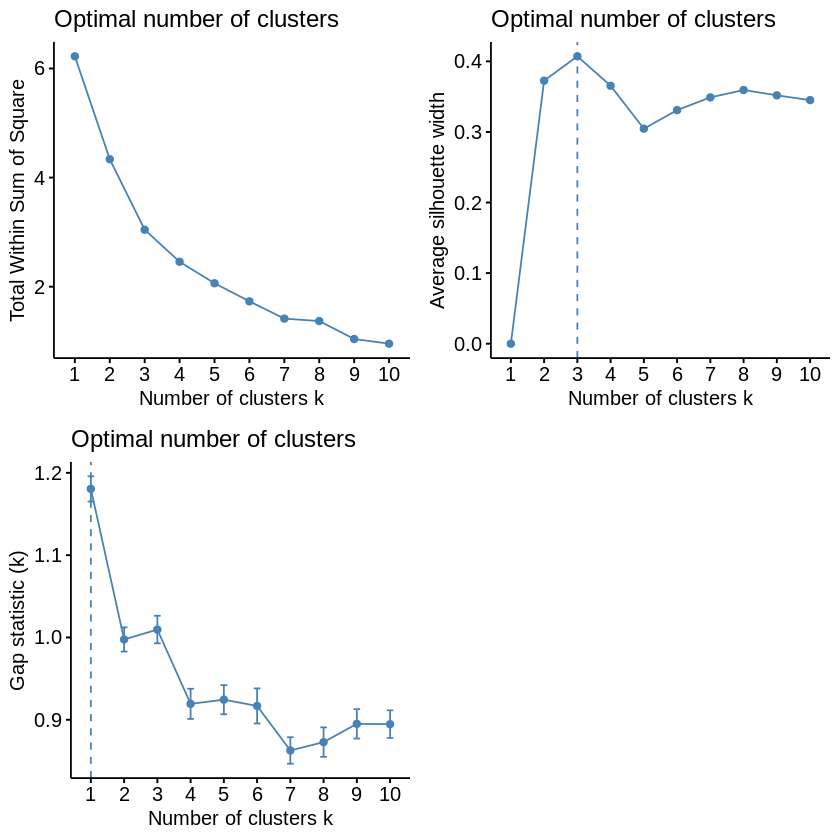

In [16]:
#Optimization method1 - Elbow Curve
p1=fviz_nbclust(df_cleaned, kmeans,method = "wss")

#Optimization method2 - silhouette
p2=fviz_nbclust(df_cleaned, kmeans,method = "silhouette")

#Optimization method3 - GAP
p3=fviz_nbclust(df_cleaned, kmeans,method = "gap_stat")

grid.arrange(p1,p2,p3,nrow=2)

##Optimization method4- NBcluster
nc = NbClust(df_cleaned, min.nc = 2, max.nc = 15, method= "kmeans")
table(nc$Best.nc[1,]) %>% as.data.frame() %>%
  plot_ly(
    x=~Var1,
    y=~Freq,
    type = "bar"
  ) %>% layout(title = "The best number of clusters : ")


### opitimized number of cluster is 3, so we make k-means model with 3

[1] 310 128  62

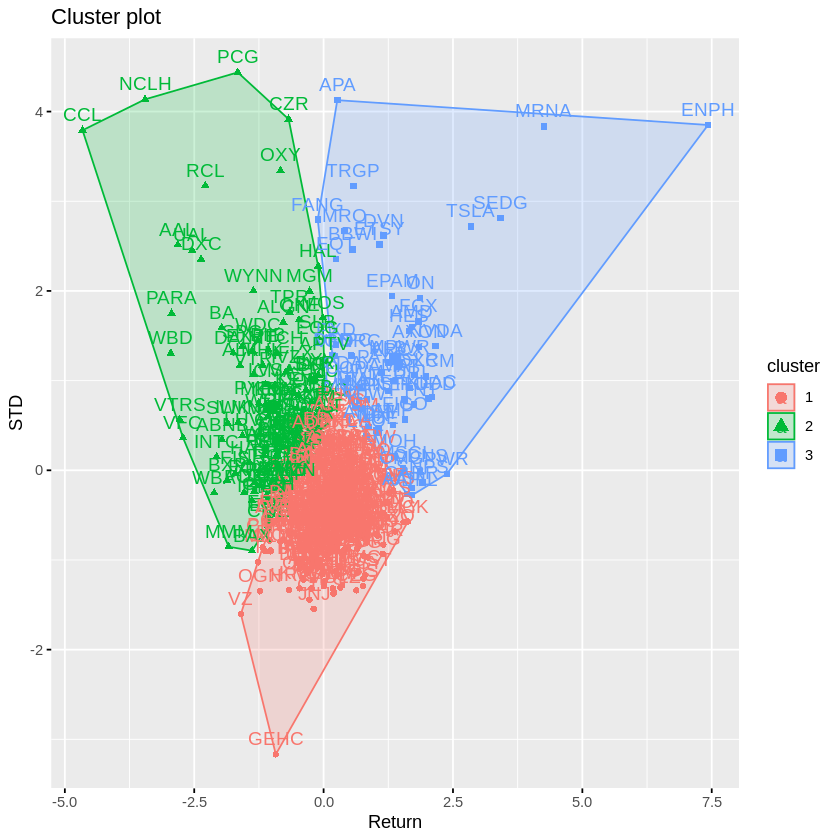

In [17]:
#fit model & visualize
fit.model = kmeans(df_cleaned,3,nstart = 25)
fit.model$size
fviz_cluster(fit.model,data = df_cleaned)

### arrange tickers by cluster

In [18]:

tc = fit.model$cluster %>%
  as.data.frame() %>%
  `colnames<-`("Cluster") %>%
  rownames_to_column(var = "Ticker")

### Download S&P500 index data and calculate cumulative return


In [20]:
#S&P cumulative return
snp = getSymbols(
  "^GSPC",
  from = start_date,
  to = end_date,
  auto.assign = FALSE
) %>% Cl() %>% ROC() %>% as.data.frame() %>%
  na.omit() %>%
  `colnames<-`("Return") %>%
  mutate(Return = cumprod(1+Return)-1)



### Make figure and cumulate lines of stocks and S&P500

In [ ]:
fig = plot_ly()

for (i in 1:3) {
  df_list = tc %>%
    filter(Cluster== i) %>%
    .$Ticker %>%
    df[.] %>%
    mutate(Return  = cumprod(1+(rowSums(.)/ncol(.)))-1) %>%
    select(Return) #portfolio return is calculated using equal-weights method

  fig = fig %>%
    add_lines(data = df_list,
              x = rownames(df_list),
              y = df_list$Return,
              name = paste0("portfolio_cluster: ",i))
}
fig %>% add_lines(data = snp,
                  x = rownames(snp),
                  y = snp$Return,
                  name = "S&P500") %>%
  layout(title = "<b> Performance: Clsuter portfolio & SNP500 </b>",
         margin = list(t=50,b=100),
         xaxis = list(title = "Date"),yaxis = list(title = "Cumulative Return")) %>%
  print()
fig

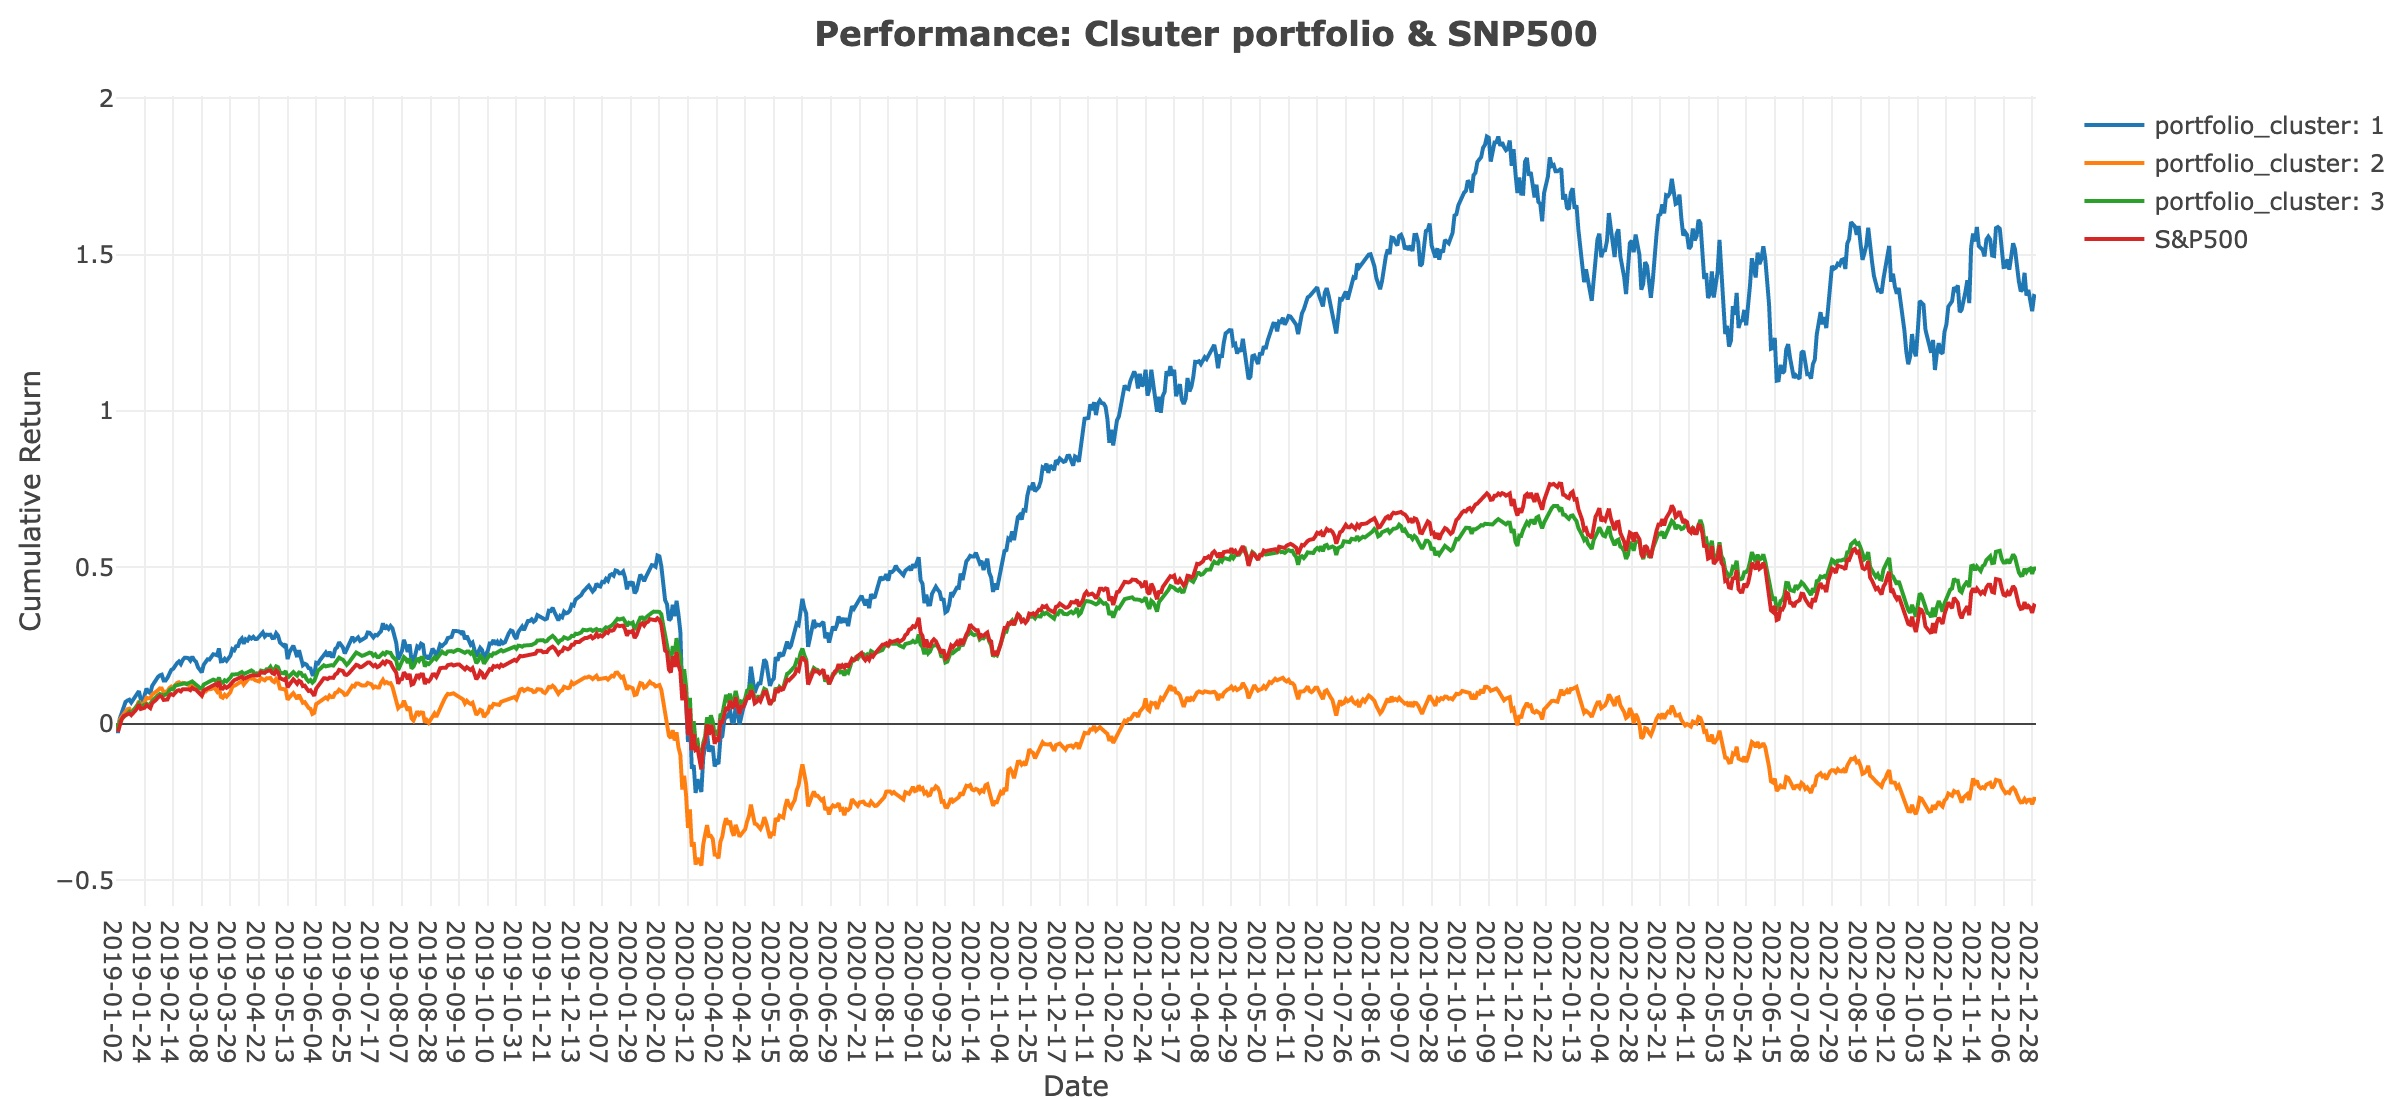